In [1]:
import pandas as pd

In [4]:
# Here we collect the source data files of each of us
DATA_DIR_MAX = ("/home/maxbl/Uni/pol_uncetainty/data")


DATA_DIR_VSKT = DATA_DIR_MAX + "/soep_rv/vskt/"

In [52]:
# In vskt: 
# ZTPTRTBEJ year of retirement start
# ZTPTRTBEM month of retirement start
data = pd.read_stata(DATA_DIR_VSKT + "SUF.SOEP-RV.VSKT.2020.fix.1-0.dta", convert_categoricals=True)
data["ZTPTRTBEJ"] = data["ZTPTRTBEJ"].astype(str)
data_filtered = data[(data["ZTPTRTBEJ"] != "kein Rentenbezug") & (data["GBJAVS"] < 1955)]

/tmp/ipykernel_37870/150868462.py:4: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata(DATA_DIR_VSKT + "SUF.SOEP-RV.VSKT.2020.fix.1-0.dta", convert_categoricals=True)


In [53]:
data_filtered.loc[:, "ZTPTRTBEJ"] = data_filtered["ZTPTRTBEJ"].astype(int)

In [54]:
data_filtered.loc[:, "retirement_age"] = data_filtered["ZTPTRTBEJ"] - data_filtered["GBJAVS"]

/tmp/ipykernel_37870/1238645061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, "retirement_age"] = data_filtered["ZTPTRTBEJ"] - data_filtered["GBJAVS"]


<Axes: xlabel='GBJAVS'>

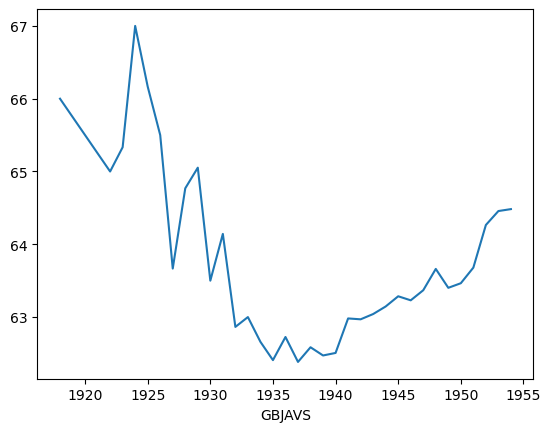

In [55]:
data_filtered.groupby("GBJAVS")["retirement_age"].mean().plot()